# Import necessary libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import datasets, utils
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from PIL import Image
from tensorflow.keras import layers, models

# Load CIFAR-10 dataset

In [11]:
 #Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to categorical
train_labels = utils.to_categorical(train_labels, num_classes=10)
test_labels = utils.to_categorical(test_labels, num_classes=10)

# Class names for CIFAR-10
category_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']


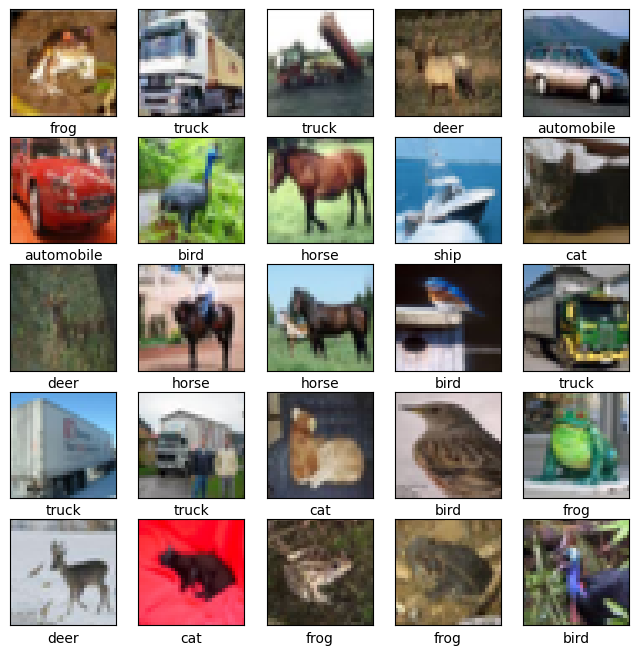

In [12]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])  # Display image
    plt.xlabel(category_names[train_labels[i].argmax()])  # Use argmax to get the class label index
plt.show()

# Load InceptionV3 as the base model

In [13]:
# Load InceptionV3 as the base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom layers on top
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

# Define the model

In [14]:
# Define the model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 37, 37,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 37, 37,    │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 37, 37,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 35, 35,    │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 35, 35,    │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 17, 17,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 17, 17,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 17, 17,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 17, 17,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 15, 15,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 15, 15,    │          0 │ batch_normalizat

 Total params: 22,066,346 (84.18 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [16]:
# Resize CIFAR-10 images to fit InceptionV3 input size (75x75)
train_images_resized = tf.image.resize(train_images, (75, 75))
test_images_resized = tf.image.resize(test_images, (75, 75))

# Train the model for 50 epochs
history = model.fit(train_images_resized, train_labels, epochs=50,
                    validation_data=(test_images_resized, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.4293 - loss: 1.6322 - val_accuracy: 0.5976 - val_loss: 1.1522
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5707 - loss: 1.2260 - val_accuracy: 0.6199 - val_loss: 1.1119
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5973 - loss: 1.1450 - val_accuracy: 0.6104 - val_loss: 1.1147
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6131 - loss: 1.0974 - val_accuracy: 0.6248 - val_loss: 1.0952
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6222 - loss: 1.0715 - val_accuracy: 0.6263 - val_loss: 1.1038
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6281 - loss: 1.0459 - val_accuracy: 0.6276 - val_loss: 1.0800
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6429 - loss: 1.0112 - val_accuracy: 0.6354 - val_loss: 1.0761
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6463 -

# Function to detect objects and draw bounding box


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted label: warplane with probability 0.9306900501251221


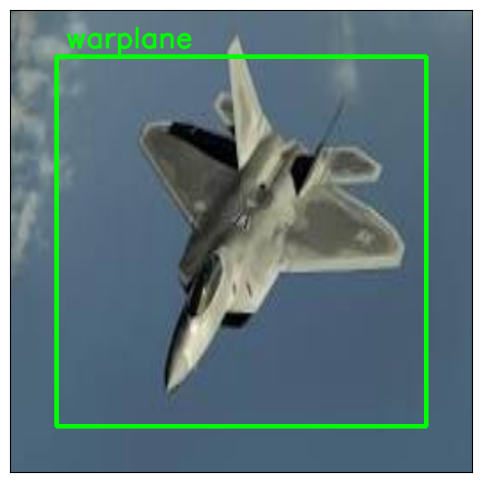

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load the InceptionV3 model with ImageNet weights
model = InceptionV3(weights='imagenet')

# Load and preprocess the image
image_path = "/content/download (2).jpeg"
img = image.load_img(image_path, target_size=(299, 299))  # Resize to InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Apply InceptionV3 preprocessing

# Predict the class
predictions = model.predict(img_array)

# Decode predictions to get human-readable class names (ImageNet categories)
decoded_predictions = decode_predictions(predictions, top=1)[0]

# Get the predicted label and probability
predicted_label = decoded_predictions[0][1]  # Class label
predicted_label_prob = decoded_predictions[0][2]  # Probability

# Display the prediction
print(f"Predicted label: {predicted_label} with probability {predicted_label_prob}")

# Load image using OpenCV for visualization
img_cv = cv2.imread(image_path)
img_cv = cv2.resize(img_cv, (500, 500))  # Resize for display

# Draw bounding box (Optional)
start_point = (50, 50)
end_point = (450, 450)
color = (0, 255, 0)  # Green
thickness = 3
cv2.rectangle(img_cv, start_point, end_point, color, thickness)

# Put label text on image
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_cv, predicted_label, (60, 40), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.grid(False)
plt.show()
